### Research Question: Which US University Produced the Best Players in the NBA in the 2014-2015 Season?

In [2]:
import pandas as pd
import pandas_profiling
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
sns.set_theme(style="darkgrid")

Step #1 - Load our data and remove any n/a values

In [3]:
players_stats_og = (
pd.read_csv('/Users/Nick/Desktop/Final Project/data/raw/players_stats.csv')
.dropna()
.reset_index()
.drop(['index'], axis = 1)
.rename(columns={"Collage" : "College", "Pos" : "Position"})
)

players_stats_og

,Name,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,Age,Birth_Place,Birthdate,College,Experience,Height,Position,Team,Weight,BMI
0,AJ Price,26,324,133,51,137,37.2,15,57,26.3,...,29.0,us,"October 7, 1986",University of Connecticut,5,185.0,PG,PHO,81.45,23.798393
1,Aaron Brooks,82,1885,954,344,817,42.1,121,313,38.7,...,30.0,us,"January 14, 1985",University of Oregon,6,180.0,PG,CHI,72.45,22.361111
2,Aaron Gordon,47,797,243,93,208,44.7,13,48,27.1,...,20.0,us,"September 16, 1995",University of Arizona,R,202.5,PF,ORL,99.00,24.142661
3,Adreian Payne,32,740,213,91,220,41.4,1,9,11.1,...,24.0,us,"February 19, 1991",Michigan State University,R,205.0,PF,ATL,106.65,25.377751
4,Al Horford,76,2318,1156,519,965,53.8,11,36,30.6,...,29.0,do,"June 3, 1986",University of Florida,7,205.0,C,ATL,110.25,26.234384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,Willie Green,52,951,306,118,306,38.6,42,121,34.7,...,34.0,us,"July 28, 1981",University of Detroit Mercy,11,190.0,SG,ORL,90.00,24.930748
346,Wilson Chandler,78,2471,1085,418,975,42.9,139,406,34.2,...,28.0,us,"May 10, 1987",DePaul University,7,200.0,SF,DEN,101.25,25.312500
347,Xavier Henry,9,86,20,3,13,23.1,0,0,0.0,...,24.0,be,"March 15, 1991",University of Kansas,4,195.0,SF,LAL,99.00,26.035503
348,Zach LaVine,77,1902,778,286,677,42.2,57,167,34.1,...,20.0,us,"March 10, 1995","University of California, Los Angeles",R,192.5,PG,MIN,85.05,22.951594


Step #2 - Filter the data to players that attended university before being drafted into the NBA, wrangle, and clean

In [4]:
players_stats_university = (
        players_stats_og[players_stats_og['College'].notnull()]
        .reset_index()
        .drop(columns=['index','Age','Games Played', 'MIN', 'Birthdate','Birth_Place', 'Experience', 'Height', 'Team', 'Weight', 'BMI']) 
        )

players_stats_university_cleaned = players_stats_university.loc[:, ['Name', 'EFF', 'College', 'Position']]

Step #4 - Group data by college attended, and determine the mean efficiency of their players

In [5]:
players_grouped_by_colleges_mean = (
    players_stats_university_cleaned.groupby(by = 'College')
    .mean()['EFF']
    .to_frame()
    .sort_values(by = 'EFF', ascending=False)
    .reset_index()
    .head(10)
    )

players_grouped_by_colleges_mean

,College,EFF
0,Davidson College,2073.000000
1,Weber State University,1677.000000
2,University of Oklahoma,1591.000000
3,Louisiana Tech University,1475.000000
4,Wake Forest University,1282.800000
5,Morehead State University,1252.000000
6,Arizona State University,1205.500000
7,Texas A&M University,1174.333333
8,DePaul University,1082.000000
9,University of Louisiana at Lafayette,1069.000000


Step #5 - Plot mean effeciency ratings using a scatterplot

Text(0.5, 1.0, 'Mean Efficiency Rating for NBA Players Coming From US Universities (2014-2015)')

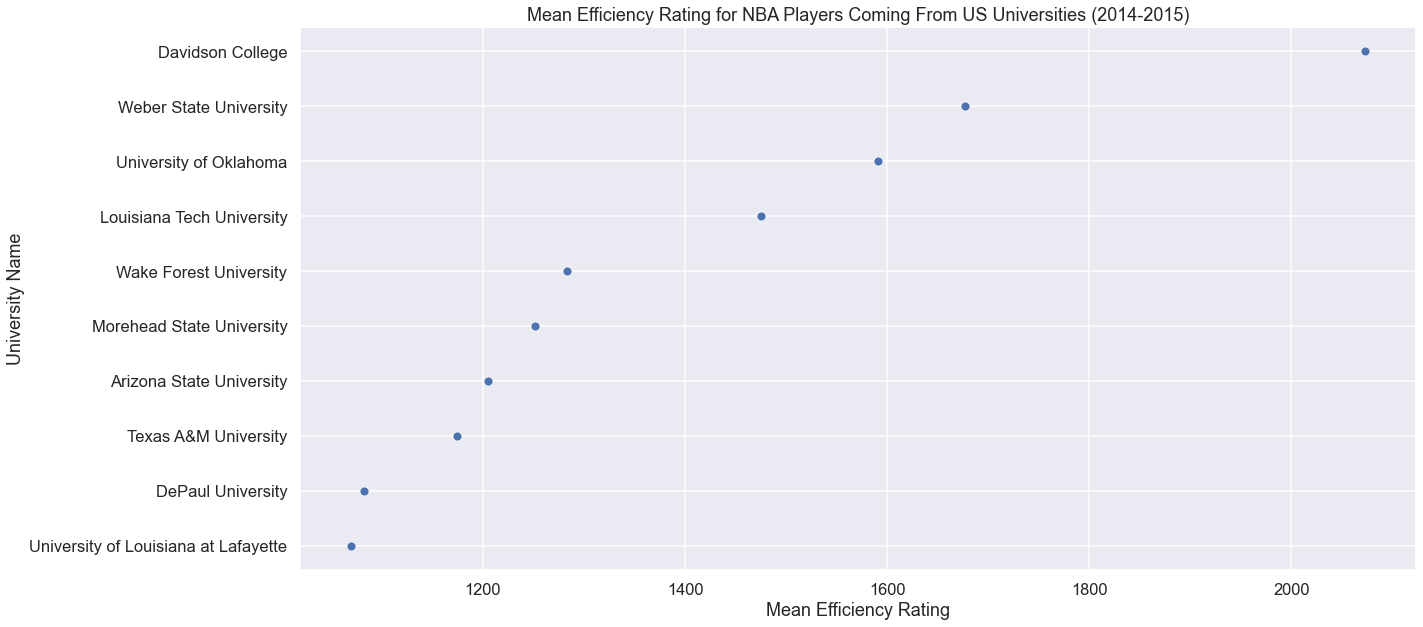

In [6]:
plt.figure(figsize=(20, 10))

sns.set_context("talk")
sns.scatterplot(data = players_grouped_by_colleges_mean,
               x = 'EFF',
               y = 'College')

plt.xlabel("Mean Efficiency Rating")
plt.ylabel("University Name")
plt.title("Mean Efficiency Rating for NBA Players Coming From US Universities (2014-2015)")

Description: The scatter plot above provides a visualization of the mean effeciency rating for NBA players that attended an American university prior to being drafted. The plot has the mean effeciency rating along the x axis, and the names of the top 10 universities on the y axis.

Conclusions: This graph shows the mean ratings of players from each school. This graph is heavily squewed, as the number 1 school from this graph only had 1 player in the NBA (Steph Curry), so the mean was extremely high. This provides valuble insight into which of the schools have a high number of players and high efficiency ratings.

Step #6 - Create table that shows the total number of active NBA players from each college

In [7]:
players_stats_university_cleaned['Number of Players'] = 1

num_players_from_uni = (
    players_stats_university_cleaned.groupby(by = 'College')
    .sum()['Number of Players']
    .to_frame()
    .reset_index()
    .sort_values(by = 'Number of Players', ascending = False)
    )

num_players_from_uni

,College,Number of Players
16,Duke University,18
72,University of Kentucky,15
61,"University of California, Los Angeles",15
85,University of North Carolina,15
71,University of Kansas,13
...,...,...
27,Lehigh University,1
81,University of Montana,1
26,La Salle University,1
53,Temple University,1


In [8]:
 num_players_from_uni = num_players_from_uni.head(30)

Step #7 - Plot this data using a barplot

Text(0.5, 1.0, 'Total Players from the Top 30 US Universities in the 2014-2015 NBA Season')

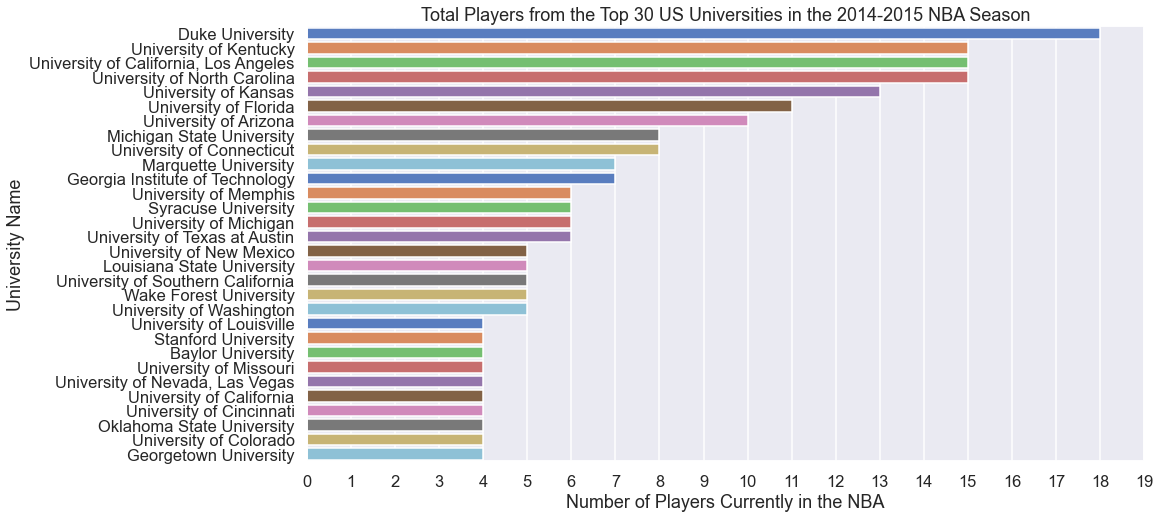

In [9]:
plt.figure(figsize = (15, 8))

ax = sns.barplot(data = num_players_from_uni, y = 'College', x = 'Number of Players', palette = 'muted')
ax.xaxis.set_ticks(np.arange(0, 20, 1))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

plt.xlabel("Number of Players Currently in the NBA")
plt.ylabel("University Name")
plt.title("Total Players from the Top 30 US Universities in the 2014-2015 NBA Season")

Description: The bar plot above provides a visualization of the total amount of players that came from each of the top 30 American universities (Determined by the number of NBA players that attended the school), ranked in descending order . The plot has the total number of players along the x axis, and the names of the top 30 universities on the y axis.

Conclusions - From the data, we can see that Duke, Kentucky, UCLA, UNC, Kansas, Florida, and Arizona have graduated the most players from their program into the NBA. This information will help us analyze the data from future plots as we determine which university has produced the top NBA talent from this season

Step #8 - Group data by college attended, and determine the sum of the efficiencies of their players

In [10]:
players_grouped_by_colleges_sum = (
    players_stats_university_cleaned.groupby(by = 'College')
    .sum()['EFF']
    .to_frame()
    .sort_values(by = 'EFF', ascending=False)
    .reset_index()
    .head(10)
    )

players_grouped_by_colleges_sum

,College,EFF
0,University of Kentucky,11030
1,Duke University,9666
2,"University of California, Los Angeles",8291
3,University of North Carolina,8217
4,University of Florida,7947
5,University of Kansas,7614
6,Wake Forest University,6414
7,University of Connecticut,5288
8,University of Arizona,5237
9,University of Texas at Austin,4712


Step #9 - Plot this data using a barplot

Text(0.5, 1.0, 'Total Efficiency Contribution by University (2014-2015)')

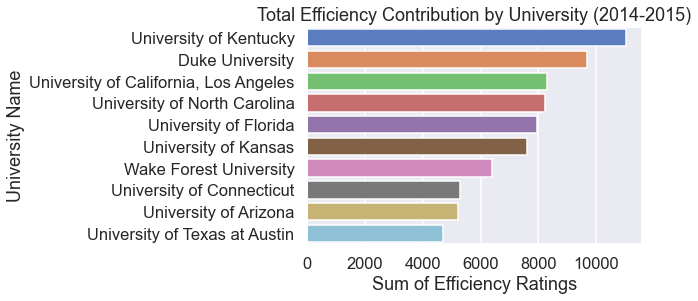

In [11]:
sns.barplot(data = players_grouped_by_colleges_sum, y = 'College', x = 'EFF', palette = 'muted')

plt.xlabel("Sum of Efficiency Ratings")
plt.ylabel("University Name")
plt.title("Total Efficiency Contribution by University (2014-2015)")

Description: The bar plot above provides a visualization of the total effeciency contribution from each of the top 10 American universities, ranked in descending order. The plot has the sum of effeciency ratings along the x axis, and the names of the top 10 universities on the y axis.

Conclusions: This graph shows the total efficeincy contribution of each of the top 10 programs. Because this was a sum of efficiencies, it makes sense that the top schools are going to have a correlation with the number of players in the league.
Duke has the highest number of players in the NBA, however the efficiency of Kentucky is still higher, meaning Kentucky has stronger players on avergae (based of the efficiency score).

Step #10 - Create a list with the top 10 schools (determined in above graph), filter, and sort players by effeciency

In [12]:
Good_Colleges = ['University of Kentucky', 'Duke University', 
                 'University of California, Los Angeles', 
                 'University of North Carolina', 'University of Florida', 'University of Kansas'
                'Wake Forest University', 'University of Connecticut', 'Unversity of Arizona', 'University of Texas at Austin']

Top_10_Schools_Players = players_stats_university_cleaned[players_stats_university_cleaned.College.isin(Good_Colleges)]

Top_10_Schools_Players.sort_values('EFF')

,Name,EFF,College,Position,Number of Players
185,Julius Randle,-3,University of Kentucky,PF,1
73,Darius Miller,-1,University of Kentucky,SF,1
12,Andre Dawkins,0,Duke University,SG,1
297,Seth Curry,0,Duke University,PG,1
68,Dahntay Jones,19,Duke University,SF,1
...,...,...,...,...,...
4,Al Horford,1530,University of Florida,C,1
83,DeMarcus Cousins,1631,University of Kentucky,C,1
212,LaMarcus Aldridge,1693,University of Texas at Austin,PF,1
13,Andre Drummond,1705,University of Connecticut,C,1


Step #11 - Plot this data using a violin plot

Text(0.5, 1.0, 'Distribution of Efficiency Based on University')

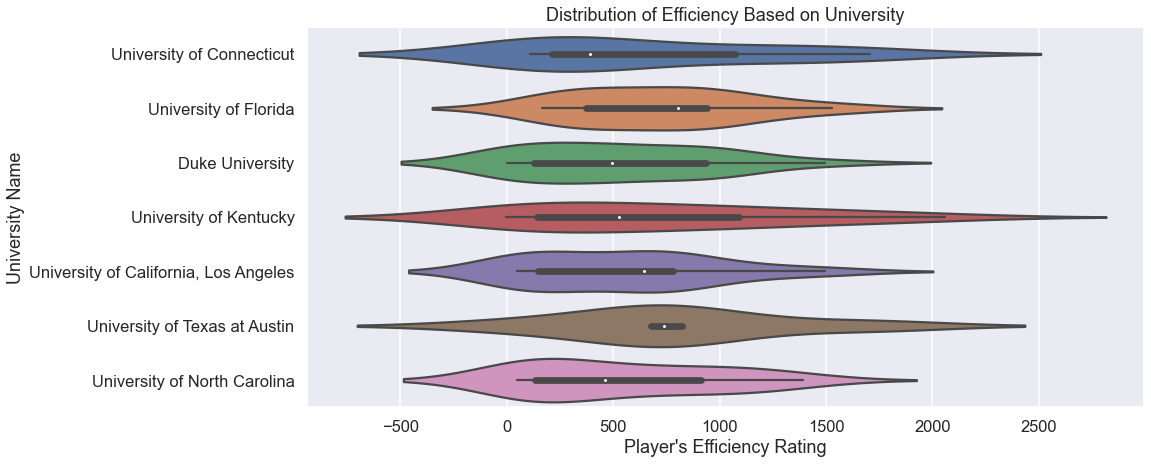

In [18]:
plt.figure(figsize = (15, 7))

sns.violinplot(data = Top_10_Schools_Players, x = 'EFF', y = 'College')

plt.xlabel("Player's Efficiency Rating")
plt.ylabel("University Name")
plt.title("Distribution of Efficiency Based on University")

Description: The violin plot above provides a visualization of the total distribution of efficiency based on the university a player attended prior to being drafted into the NBA. The plot has the inidividual player's efficiency rating along the x axis, and the name of each of the top 10 American universities along the y axis.

Conclusions: From this graph, we are able to see the total distribution of player rankings at each of the top 10 schools. 

Insights
- Highest Value: Kentucky
- Lowest Value: Kentucky
- University of Kentucky seems to have the nicest spread of data, with a min value of -3 and a max value of 2059. What's interesting too is their position relative to schools that have a similar number of players in the NBA (Duke - 18, Kentucky, UCLA, UNC - 15)
- Kentucky is dominating the other three largest programs in this graph, and this will help us draw our final conclusions later on.

Step #12 - Using the data from Step #11, create a bar plot that shows each of the top 10 university's mean effeciency, separated by player position

Text(0.5, 1.0, 'Distribution of Efficiency Based on University / Position - Without CI')

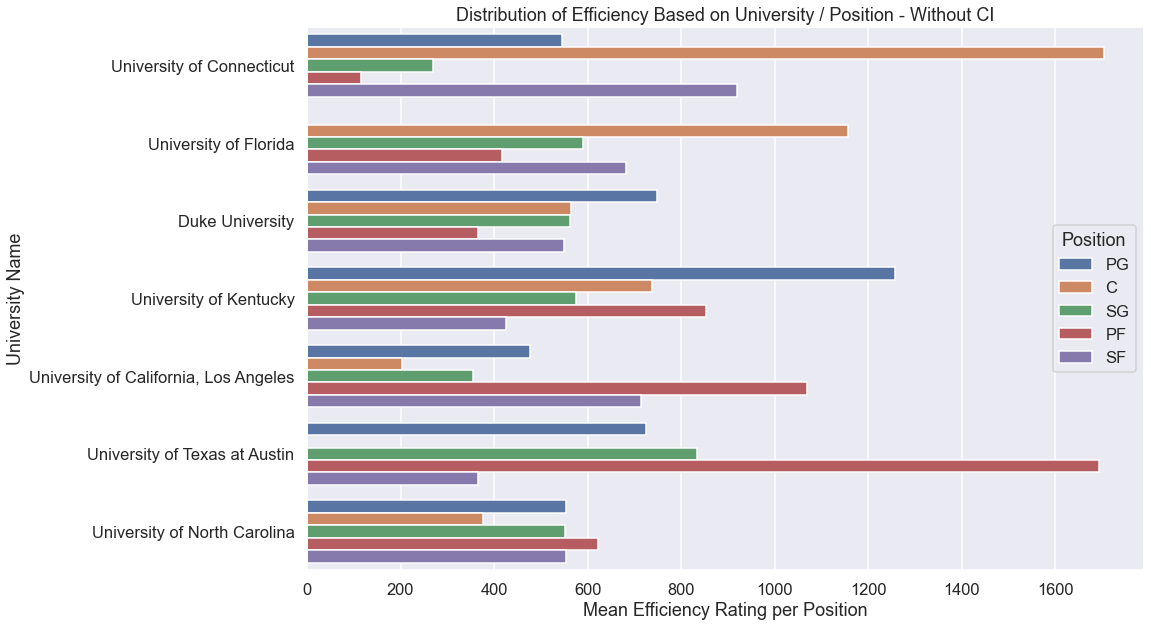

In [14]:
plt.figure(figsize = (15, 10))

sns.barplot(data = Top_10_Schools_Players, y = 'College', x = 'EFF', hue = 'Position', ci = None)

plt.xlabel("Mean Efficiency Rating per Position")
plt.ylabel("University Name")
plt.title("Distribution of Efficiency Based on University / Position - Without CI")

Text(0.5, 1.0, 'Distribution of Efficiency Based on University / Position - With CI')

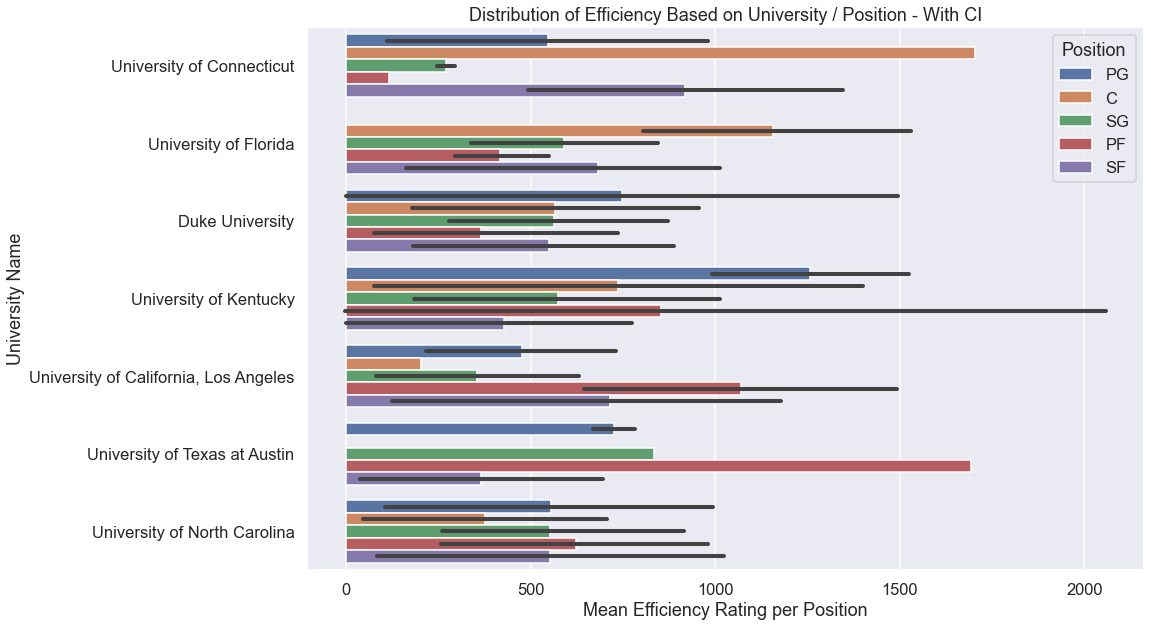

In [15]:
plt.figure(figsize = (15, 10))

sns.barplot(data = Top_10_Schools_Players, y = 'College', x = 'EFF', hue = 'Position')

plt.xlabel("Mean Efficiency Rating per Position")
plt.ylabel("University Name")
plt.title("Distribution of Efficiency Based on University / Position - With CI")

Description: This pair of bar plots show the distribution of efficiency based on a player's position and the univerisity they attended prior to being drafted. The top plot shows the information solely based on the mean efficiency score of each position, while the bottom plot includes a confidence interval as well, so that the viewer is able to see both the maximum and minimum effeciency scores in each bar. Both plots have the mean efficiency rating per position along the x axis, and the university name along the y axis.

Conclusions: These tables show the average efficiency of each position from the top schools. Some schools only had a single player in a given position during this season, so those will not have any CI.
Based on the graph, Kentucky has on average strong players in every position, as well as the single best performing player in terms of effieciency.
Best positions:
Point Guard: Kentucky
Center: Connecticut
Shooting Guard: Texas at Austin
Power Forward: Texas at Austin
Small Forward: Connecticut

Step #13 - Create table that shows the top 10 players in the NBA that went to university prior to being drafted, and sort by effeciency rating

In [16]:
top_players = players_stats_university_cleaned.sort_values('EFF', ascending = False).head(10)

top_players

,Name,EFF,College,Position,Number of Players
136,James Harden,2202,Arizona State University,SG,1
58,Chris Paul,2125,Wake Forest University,PG,1
309,Stephen Curry,2073,Davidson College,PG,1
20,Anthony Davis,2059,University of Kentucky,PF,1
80,DeAndre Jordan,1949,Texas A&M University,C,1
256,Nikola Vucevic,1716,University of Southern California,C,1
13,Andre Drummond,1705,University of Connecticut,C,1
212,LaMarcus Aldridge,1693,University of Texas at Austin,PF,1
69,Damian Lillard,1677,Weber State University,PG,1
83,DeMarcus Cousins,1631,University of Kentucky,C,1


Step #14 - Create a scatterplot that shows the top 10 players, their effeciency ratings, and the school they attended

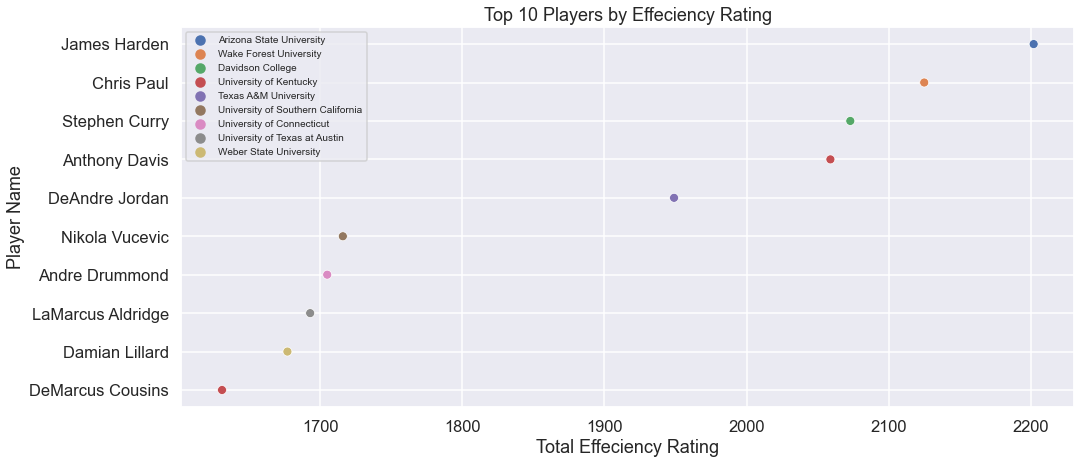

In [17]:
plt.figure(figsize = (16, 7))

sns.scatterplot(data = top_players, y = 'Name', x = 'EFF', hue = 'College')

plt.xlabel("Total Effeciency Rating")
plt.ylabel("Player Name")
plt.title("Top 10 Players by Effeciency Rating")

plt.legend(loc="upper left", markerscale=1, scatterpoints=1, fontsize=10)
plt.show()

Conclusions: From this graph, we're able to see the top performing NBA players according to their individiual effeciency rating, as well as the college they attended prior to being drafted. 

Insights
- Minumum Value: Kentucky
- Maximum Value: Arisona State University
- All of the players listed on this graph are coming from different universities, with the exception of DeMarcus Cousins and Anthony Davis, who both attended Kentucky.
- We can assume that this makes Kentucky's program fairly dominant compared to the other schools listed on this graph.

# Final Conclusion

The graphs show a variety of data that can be looked at in different ways to answer the question of which US university produced the best players in the NBA for the 2014-15 season. The school with the best mean player score was Davidson College, but this was due to them only having 1 player in the NBA, who performed exceptionally well. In terms of overall contribution to the league (the sum of player efficiencies), University of Kentucky had the highest contribution to the NBA. However, they also did not have the highest number of players in the league, meaning this sum was not just calculated based on them having lots of players, but on average higher quality players. This was supported by the findings in step 12 showing the mean scores based on position and school. Kentucky had on avergae high scores across the board, as well as having the best point guard and power forward. This data shows that Kentucky was the strongest school based on having the highest efficiency sum, one of the highest rated players, and the best point guards/power forwards.